In [1]:
from simulation_parser import parse_simulation_files
from output_generator import get_velocities
from pdf import data_to_pdf
from plot_generator import plot_multiple_pdf
import numpy as np

In [2]:
lower_limit = 0
upper_limit = None

In [3]:
input_files = {
    10 : {
        "static"  : "./ej2_2/static-N10-ordered.txt",
        "dynamic" : "./ej2_2/dynamic-N10-ordered.txt"
    },
    20 : {
        "static"  : "./ej2_2/static-N20-ordered.txt",
        "dynamic" : "./ej2_2/dynamic-N20-ordered.txt"
    },
    30 : {
        "static"  : "./ej2_2/static-N30-ordered.txt",
        "dynamic" : "./ej2_2/dynamic-N30-ordered.txt"
    }
}

In [4]:
limits = (lower_limit, upper_limit)

In [5]:
sim_infos = dict()

for N in input_files.keys():
    sim_infos[N] = parse_simulation_files(input_files[N]["static"], input_files[N]["dynamic"])

In [6]:
velocities_init = dict()
velocities_stat = dict()

for N in sim_infos.keys():
    velocities_init[N] = get_velocities(sim_infos[N], (0, 1))
    velocities_stat[N] = get_velocities(sim_infos[N], limits)
    velocities_init[N] = np.reshape(velocities_init[N], velocities_init[N].size)
    velocities_stat[N] = np.reshape(velocities_stat[N], velocities_stat[N].size)

In [7]:
pdf_init         = dict()
values_init      = dict()
class_width_init = dict()

pdf_stat         = dict()
values_stat      = dict()
class_width_stat = dict() 

for N in input_files.keys():
    pdf_init[N], values_init[N], class_width_init[N] = data_to_pdf(velocities_init[N], (9, 12))
    pdf_stat[N], values_stat[N], class_width_stat[N] = data_to_pdf(velocities_stat[N], (9, 12))

In [8]:
print("init")
for N in pdf_init.keys():
    print(N, "(area):", np.sum(pdf_init[N] * class_width_init[N]))
print()
print("stat")
for N in pdf_stat.keys():
    print(N, "(area):", np.sum(pdf_stat[N] * class_width_stat[N]))

init
10 (area): 1.0
20 (area): 1.0
30 (area): 1.0

stat
10 (area): 1.0
20 (area): 1.0
30 (area): 1.0


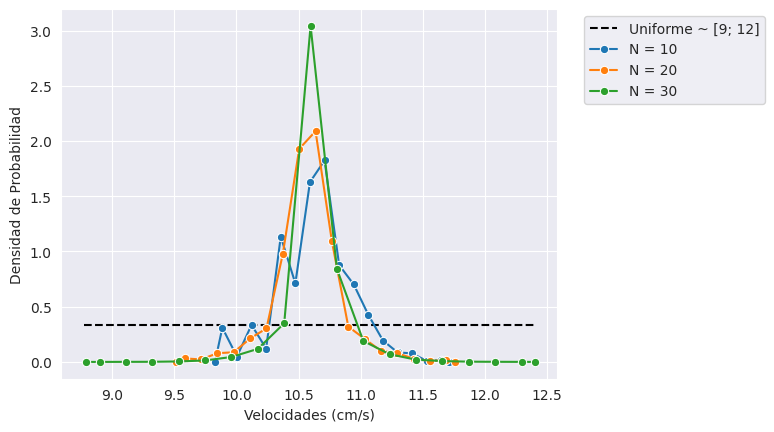

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
pdf_uniform = 1 / (12 -9)
plt.plot([8.77,12.45], [pdf_uniform, pdf_uniform], linestyle="--", color="black", label="Uniforme ~ [9; 12]")
plot_multiple_pdf(list(values_stat.values()), list(pdf_stat.values()), ["N = " + str(N) for N in pdf_stat.keys()])

In [10]:
values_stat

{10: array([ 9.82724421,  9.88608398, 10.00376351, 10.12144305, 10.23912259,
        10.35680212, 10.47448166, 10.5921612 , 10.70984073, 10.82752027,
        10.94519981, 11.06287934, 11.18055888, 11.29823842, 11.41591795,
        11.53359749, 11.65127703, 11.71011679]),
 20: array([ 9.51665381,  9.58257527,  9.71441818,  9.8462611 ,  9.97810401,
        10.10994693, 10.24178984, 10.37363275, 10.50547567, 10.63731858,
        10.76916149, 10.90100441, 11.03284732, 11.16469024, 11.29653315,
        11.42837606, 11.56021898, 11.69206189, 11.75798335]),
 30: array([ 8.79113964,  8.89738179,  9.10986608,  9.32235037,  9.53483466,
         9.74731895,  9.95980324, 10.17228754, 10.38477183, 10.59725612,
        10.80974041, 11.0222247 , 11.23470899, 11.44719328, 11.65967757,
        11.87216186, 12.08464616, 12.29713045, 12.40337259])}